In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/squarewithtwoholes/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().squarewithtwoholes()

X.shape =  (9169, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=15, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2292 points processed...
A_k, Atilde_k: 4584 points processed...
A_k, Atilde_k: 6876 points processed...
A_k, Atilde_k: 9168 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2292 points processed...
local_param: 4584 points processed...
local_param: 6876 points processed...
local_param: 9168 points processed...
local_param: all 9169 points processed...
After iter 1, max distortion is 10.975483
After iter 2, max distortion is 8.449375
After iter 3, max distortion is 8.409330
After iter 4, max distortion is 8.409330
After iter 5, max distortion is 8.409330
After iter 6, max distortion is 8.409330
After iter 7, max distortion is 8.409330
Max local distortion = 8.409329849237666
###############
Took 72.2 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion int

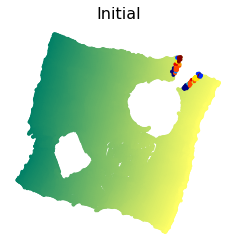

###############
Took 4.6 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0005534108246590607


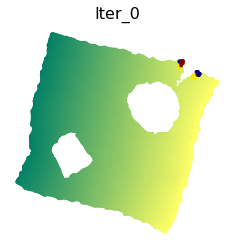

Iteration: 1
error: 0.0005397053546472615
Iteration: 2
error: 0.0005305362878796318
Iteration: 3
error: 0.0005277786527195714
Iteration: 4
error: 0.0005265013087028211
Iteration: 5
error: 0.0005259410340611371


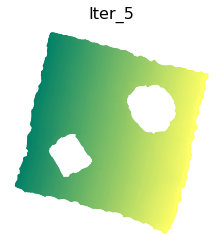

Iteration: 6
error: 0.0005258218623437942
Iteration: 7
error: 0.0005258170876839772
Iteration: 8
error: 0.0005258892637631853
Iteration: 9
error: 0.0005260967524847532
Iteration: 10
error: 0.0005262604949605445


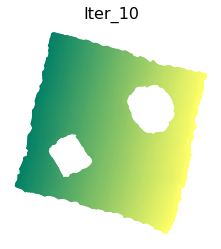

Iteration: 11
error: 0.0005264613094427841
Iteration: 12
error: 0.0005266007022701861
Iteration: 13
error: 0.0005267724439060479
Iteration: 14
error: 0.000526926669726602
Iteration: 15
error: 0.0005270335990426878


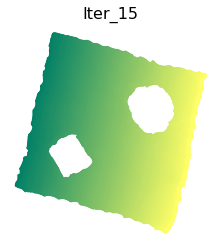

Iteration: 16
error: 0.0005271249174716277
Iteration: 17
error: 0.0005272012995558465
Iteration: 18
error: 0.0005272915149041307
Iteration: 19
error: 0.0005273604778987525


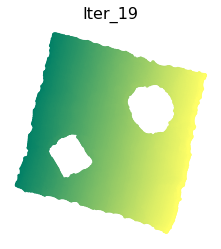

###############
Took 150.9 seconds to refine global embedding.
###############
###############
Took 156.1 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=10, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

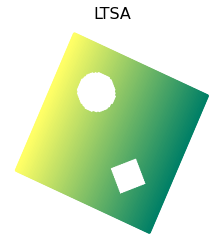

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

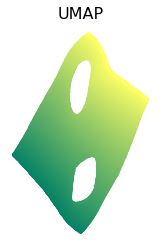

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

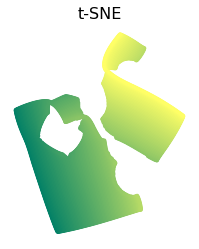

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')